# FPL Team Analysis Notebook
This notebook downloads FPL team data (entry history) and visualizes points, overall rank, and GW rank progression.

In [26]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def fetch_team(entry_id: int) -> dict:
    url = f'https://fantasy.premierleague.com/api/entry/{entry_id}/'
    return requests.get(url).json()

def fetch_team_history(entry_id: int) -> dict:
    url = f'https://fantasy.premierleague.com/api/entry/{entry_id}/history/'
    return requests.get(url).json()

def get_team_current_history(entry_id: int):
    history = fetch_team_history(entry_id)
    return history.get('current', [])


## Enter your FPL Entry ID

In [27]:
entry_id = 2709841  # <--- Replace with your real entry ID

team = fetch_team(entry_id)
history = get_team_current_history(entry_id)
df = pd.DataFrame(history)
df.head()

,event,points,total_points,rank,rank_sort,overall_rank,percentile_rank,bank,value,event_transfers,event_transfers_cost,points_on_bench
0,1,45,45,7165720.0,7230872.0,7165709,80.0,0,1000,0,0,12
1,2,48,93,6318163.0,6349498.0,6930294,60.0,10,1001,1,0,9
2,3,49,142,5135661.0,5161947.0,6213081,50.0,2,1000,1,0,3
3,4,76,218,1896301.0,1924558.0,4153025,20.0,6,1002,0,0,18
4,5,53,271,1811822.0,1845611.0,2968293,20.0,6,1009,0,0,11


## Team Info Summary

In [28]:
team_info = {
    'Team Name': team.get('name'),
    'Player Name': team.get('player_first_name') + ' ' + team.get('player_last_name'),
    'Region': team.get('player_region_name'),
    'Started in GW': team.get('started_event'),
    'Overall Rank Now': team.get('summary_overall_rank'),
    'Total Points': team.get('summary_overall_points'),
}
team_info

{'Team Name': 'ХНК Хајдук 1911',
 'Player Name': 'Горан Јанковић',
 'Region': 'Serbia',
 'Started in GW': 1,
 'Overall Rank Now': 1364464,
 'Total Points': 722}

## Histogram of GW Points

## Overall Rank Progression

In [29]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

entry_id = 2709841

# Fetch history
history = requests.get(f"https://fantasy.premierleague.com/api/entry/{entry_id}/history/").json()

df = pd.DataFrame(history["current"]).sort_values("event")

# Extract chips robustly
chip_events = []
chip_map = {
    "wildcard": "WC",
    "freehit": "FH",
    "bboost": "BB",
    "3xc": "TC"
}

for chip in history.get("chips", []):
    status = chip.get("status_for_entry", "played")  # fallback if missing
    if status == "played":
        raw_name = chip["name"]
        mapped_name = chip_map.get(raw_name, raw_name.upper())
        chip_events.append((chip["event"], mapped_name))

chip_events

[(4, 'WC'), (9, 'BB'), (13, 'TC')]

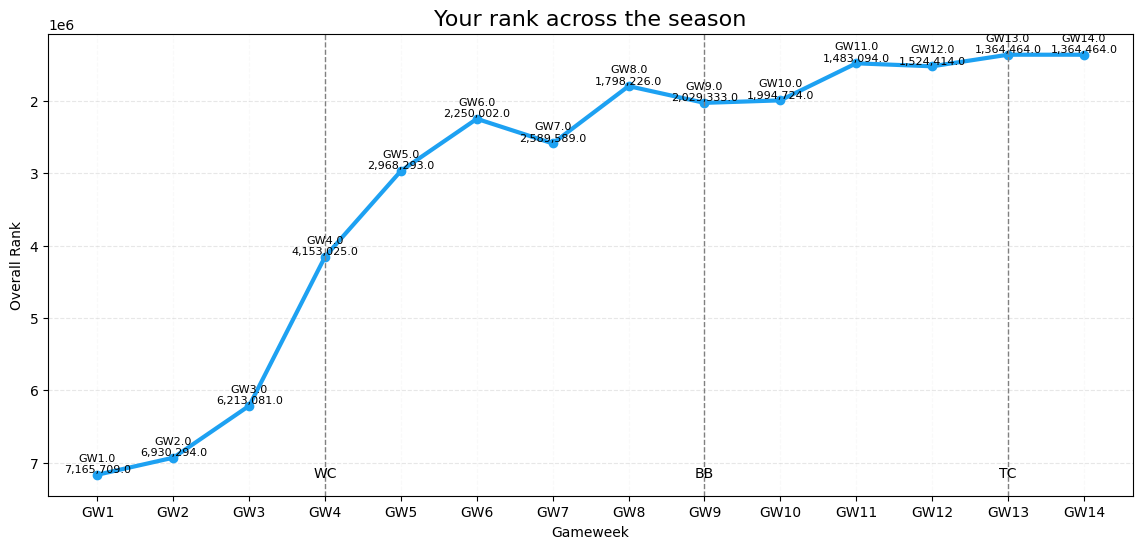

In [30]:

plt.figure(figsize=(14, 6))

plt.plot(df["event"], df["overall_rank"], marker="o", linewidth=3, color="#1DA1F2")
plt.gca().invert_yaxis()

plt.xticks(df["event"], [f"GW{gw}" for gw in df["event"]])

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.grid(axis="x", linestyle="--", alpha=0.07)

plt.title("Your rank across the season", fontsize=16)
plt.xlabel("Gameweek")
plt.ylabel("Overall Rank")

# Draw chip lines automatically
for gw, label in chip_events:
    plt.axvline(x=gw, color="gray", linestyle="--", linewidth=1)
    plt.text(gw, df["overall_rank"].max()*1.01, label, ha="center", va="bottom", fontsize=10)

# Data point labels
for _, row in df.iterrows():
    plt.text(
        row["event"],
        row["overall_rank"],
        f"GW{row['event']}\n{row['overall_rank']:,}",
        fontsize=8,
        ha="center",
        va="bottom"
    )

plt.show()

